# Imports and setup

In [1199]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats # from scipy import stats

from IPython.display import display as ipy_display

plt.rcParams['axes.grid'] = True

def show_df(df, nrows=100, ncols=25):
    with pd.option_context("display.max_rows", nrows, "display.max_columns", ncols,): display(df)

# Datasets

In [1200]:
zika_df = pd.read_csv('./data/zika_virus.csv')
ebola_df = pd.read_csv('./data/ebola_virus.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Coronavirus

## Questions
1. How quickly did it take for the coronavirus to spread around China? Worldwide?
2. How long does it take for someone to die after they have been confirmed? Recover?
3. What is the average recovery rate? Which country has the best recovery rate? What about death rate?
4. For each country, if one person had the coronavirus, how many people would they be able to infect in a day?  
    If one person had the coronavirus, how many people in average would they be able to infect in a day?
5. 

bad question?  
What country was the first person to get coronavirus in the Diamond Princess most likely from? Or when did the first person diagnosed with coronavirus board the ship?
- check which countries the diamond princess visited
- analyze the infection rate of those countries
- compare diamond princess data w/ infection rate

### Import dataset

In [1260]:
corona_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

corona_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

corona_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

### Create coronavirus dataframe

In [1261]:
corona_confirmed = corona_confirmed.drop(columns=['Lat', 'Long'])
corona_confirmed['Case_Type'] = 'Confirmed'

corona_deaths = corona_deaths.drop(columns=['Lat', 'Long'])
corona_deaths['Case_Type'] = 'Deaths'

corona_recovered = corona_recovered.drop(columns=['Lat', 'Long'])
corona_recovered['Case_Type'] = 'Recovered'

In [1262]:
_corona = pd.concat([corona_confirmed, corona_deaths, corona_recovered])

# DataFrame w/o groupby()
cols = list(_corona)
cols.insert(1, cols.pop(cols.index('Case_Type')))
corona = _corona.loc[:, cols]

# DataFrame w/ groupby()
corona_group = corona.loc[:, cols].groupby(["Country/Region", "Case_Type"]).sum()
corona_group.loc[:, ::-1]

3/8/20  3/7/20  3/6/20  3/5/20  3/4/20  3/3/20  \
Country/Region Case_Type                                                   
Afghanistan    Confirmed       4       1       1       1       1       1   
               Deaths          0       0       0       0       0       0   
               Recovered       0       0       0       0       0       0   
Algeria        Confirmed      19      17      17      12      12       5   
               Deaths          0       0       0       0       0       0   
...                          ...     ...     ...     ...     ...     ...   
Vatican City   Deaths          0       0       0       0       0       0   
               Recovered       0       0       0       0       0       0   
Vietnam        Confirmed      30      18      16      16      16      16   
               Deaths          0       0       0       0       0       0   
               Recovered      16      16      16      16      16      16   

                          3/2/20  3/1/20  2/29/20  2/28/20  2/27/20  2/26/20  \
Country/Region Case_Type                                                       
Afghanistan    Confirmed       1       1        1        1        1        1   
               Deaths          0       0        0        0        0        0   
               Recovered       0       0        0        0        0        0   
Algeria        Confirmed       3       1        1        1        1        1   
               Deaths          0       0        0        0        0        0   
...                          ...     ...      ...      ...      ...      ...   
Vatican City   Deaths          0       0        0        0        0        0   
               Recovered       0       0        0        0        0        0   
Vietnam        Confirmed      16      16       16       16       16       16   
               Deaths          0       0        0        0        0        0   
               Recovered      16      16       16       16       16       16   

                          2/25/20  2/24/20  2/23/20  2/22/20  2/21/20  \
Country/Region Case_Type                                                
Afghanistan    Confirmed        1        1        0        0        0   
               Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   
Algeria        Confirmed        1        0        0        0        0   
               Deaths           0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
Vatican City   Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   
Vietnam        Confirmed       16       16       16       16       16   
               Deaths           0        0        0        0        0   
               Recovered       16       14       14       14       14   

                          2/20/20  2/19/20  2/18/20  2/17/20  2/16/20  \
Country/Region Case_Type                                                
Afghanistan    Confirmed        0        0        0        0        0   
               Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   
Algeria        Confirmed        0        0        0        0        0   
               Deaths           0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
Vatican City   Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   
Vietnam        Confirmed       16       16       16       16       16   
               Deaths           0        0        0        0        0   
               Recovered        7        7        7        7        7   

                          2/15/20  2/14/20  2/13/20  2/12/20  2/11/20  \
Country/Region Case_Typ

## Worldwide (not including China)

In [1326]:
world_no_china = corona[~(corona.loc[:, 'Country/Region'] == 'Mainland China')]
world_group = world_no_china.loc[:, cols].groupby(["Country/Region", "Case_Type"]).sum()

world_infection_rate = []
world_death_rate = []
world_recovery_rate = []

world_group

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region Case_Type                                                
Afghanistan    Confirmed        0        0        0        0        0   
               Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   
Algeria        Confirmed        0        0        0        0        0   
               Deaths           0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
Vatican City   Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   
Vietnam        Confirmed        0        2        2        2        2   
               Deaths           0        0        0        0        0   
               Recovered        0        0        0        0        0   

                          1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
Country/Region Case_Type                                                        
Afghanistan    Confirmed        0        0        0        0        0       0   
               Deaths           0        0        0        0        0       0   
               Recovered        0        0        0        0        0       0   
Algeria        Confirmed        0        0        0        0        0       0   
               Deaths           0        0        0        0        0       0   
...                           ...      ...      ...      ...      ...     ...   
Vatican City   Deaths           0        0        0        0        0       0   
               Recovered        0        0        0        0        0       0   
Vietnam        Confirmed        2        2        2        2        2       6   
               Deaths           0        0        0        0        0       0   
               Recovered        0        0        0        0        0       1   

                          2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
Country/Region Case_Type                                                   
Afghanistan    Confirmed       0       0       0       0       0       0   
               Deaths          0       0       0       0       0       0   
               Recovered       0       0       0       0       0       0   
Algeria        Confirmed       0       0       0       0       0       0   
               Deaths          0       0       0       0       0       0   
...                          ...     ...     ...     ...     ...     ...   
Vatican City   Deaths          0       0       0       0       0       0   
               Recovered       0       0       0       0       0       0   
Vietnam        Confirmed       6       8       8       8      10      10   
               Deaths          0       0       0       0       0       0   
               Recovered       1       1       1       1       1       1   

                          2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  \
Country/Region Case_Type                                                       
Afghanistan    Confirmed       0       0        0        0        0        0   
               Deaths          0       0        0        0        0        0   
               Recovered       0       0        0        0        0        0   
Algeria        Confirmed       0       0        0        0        0        0   
               Deaths          0       0        0        0        0        0   
...                          ...     ...      ...      ...      ...      ...   
Vatican City   Deaths          0       0        0        0        0        0   
               Recovered       0       0        0        0        0        0   
Vietnam        Confirmed      13      13       14       15       15       16   
               Deaths          0       0        0        0        0        0   
               Recovered       1       1        1        6        6      

## China

In [1204]:
china_total = corona_group.loc['Mainland China']
china_total

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
Case_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Confirmed,547,639,916,1399,2062,2863,5494,6070,8124,9783,11871,16607,19693,23680,27409,30553,34075,36778,39790,42306,44327,44699,59832,66292,68347,70446,72364,74139,74546,74999,75472,76922,76938,77152,77660,78065,78498,78824,79251,79826,80026,80151,80271,80422,80573,80652,80699
Deaths,17,18,26,42,56,82,131,133,171,213,259,361,425,490,562,632,717,804,904,1011,1111,1116,1368,1520,1662,1765,1863,2002,2114,2236,2236,2441,2443,2593,2663,2715,2744,2788,2835,2870,2912,2945,2981,3013,3042,3070,3097
Recovered,28,30,36,39,49,58,101,120,135,214,275,463,614,843,1115,1476,1998,2595,3218,3917,4635,5079,6213,7973,9294,10748,12455,14199,15952,18002,18693,22687,23170,24990,27650,30053,32898,36291,39279,42118,44810,47404,49955,52240,53888,55478,57320


In [1205]:
china_confirmed = china_total.loc['Confirmed']
china_deaths = china_total.loc['Deaths']
china_recovery = china_total.loc['Recovered']

china_infection_rate = []
china_death_rate = []
china_recovery_rate = []

for i in range(0, len(china_confirmed)-1):
    china_infection_rate.append(china_confirmed.iloc[i + 1] - china_confirmed.iloc[i])
    china_death_rate.append(china_deaths.iloc[i + 1] - china_deaths.iloc[i])
    china_recovery_rate.append(china_recovery.iloc[i + 1] - china_recovery.iloc[i])

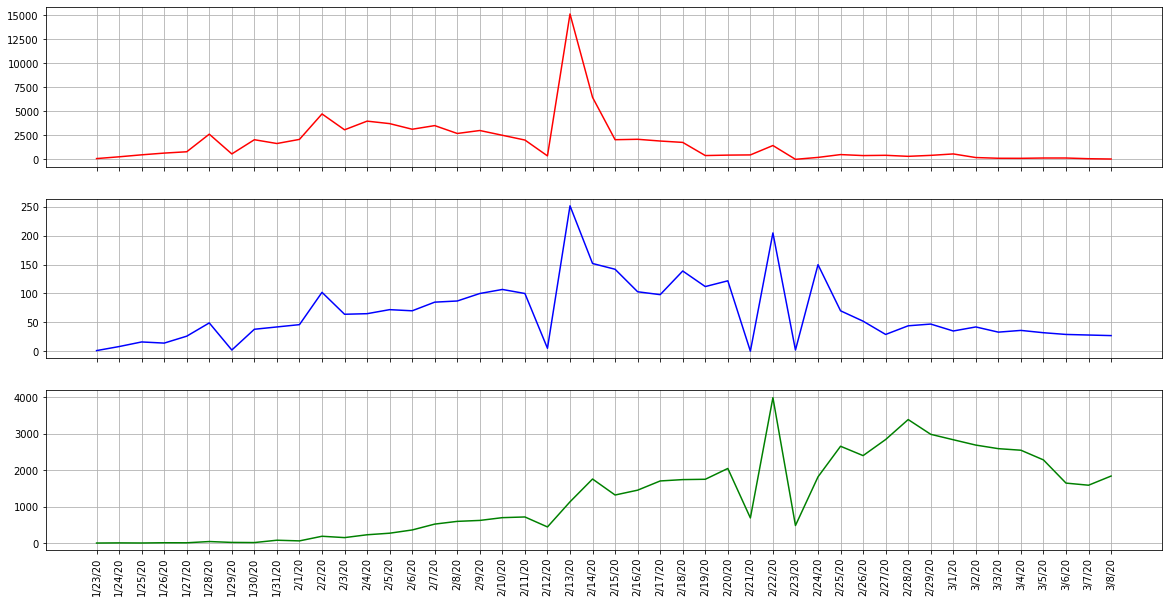

In [1206]:
fig, axs = plt.subplots(3, figsize=(20, 10), sharex=True)
plt.xticks(rotation=90)
axs[0].plot(china_total.columns[1:], china_infection_rate, color='red')
axs[1].plot(china_total.columns[1:], china_death_rate, color='blue')
axs[2].plot(china_total.columns[1:], china_recovery_rate, color='green')

### Why does China's death rate follow so closely to it's infection rate?

## United States

In [1207]:
us_total = corona_group.loc['US']
us_total.loc[:, ::-1]

,3/8/20,3/7/20,3/6/20,3/5/20,3/4/20,3/3/20,3/2/20,3/1/20,2/29/20,2/28/20,2/27/20,2/26/20,2/25/20,2/24/20,2/23/20,2/22/20,2/21/20,2/20/20,2/19/20,2/18/20,2/17/20,2/16/20,2/15/20,2/14/20,2/13/20,2/12/20,2/11/20,2/10/20,2/9/20,2/8/20,2/7/20,2/6/20,2/5/20,2/4/20,2/3/20,2/2/20,2/1/20,1/31/20,1/30/20,1/29/20,1/28/20,1/27/20,1/26/20,1/25/20,1/24/20,1/23/20,1/22/20
Case_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Confirmed,538,416,277,220,152,121,101,76,70,62,60,59,53,53,35,35,35,15,15,15,15,15,15,15,15,13,13,12,12,12,12,12,12,11,11,8,8,7,5,5,5,5,5,2,2,1,1
Deaths,21,17,14,12,11,7,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Recovered,8,8,8,8,8,8,7,7,7,7,6,6,6,5,5,5,5,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1208]:
us_confirmed = us_total.loc['Confirmed']
us_deaths = us_total.loc['Deaths']
us_recovery = us_total.loc['Recovered']

us_infection_rate = []
us_death_rate = []
us_recovery_rate = []

for i in range(0, len(china_confirmed)-1):
    us_infection_rate.append(us_confirmed.iloc[i + 1] - us_confirmed.iloc[i])
    us_death_rate.append(us_deaths.iloc[i + 1] - us_deaths.iloc[i])
    us_recovery_rate.append(us_recovery.iloc[i + 1] - us_recovery.iloc[i])

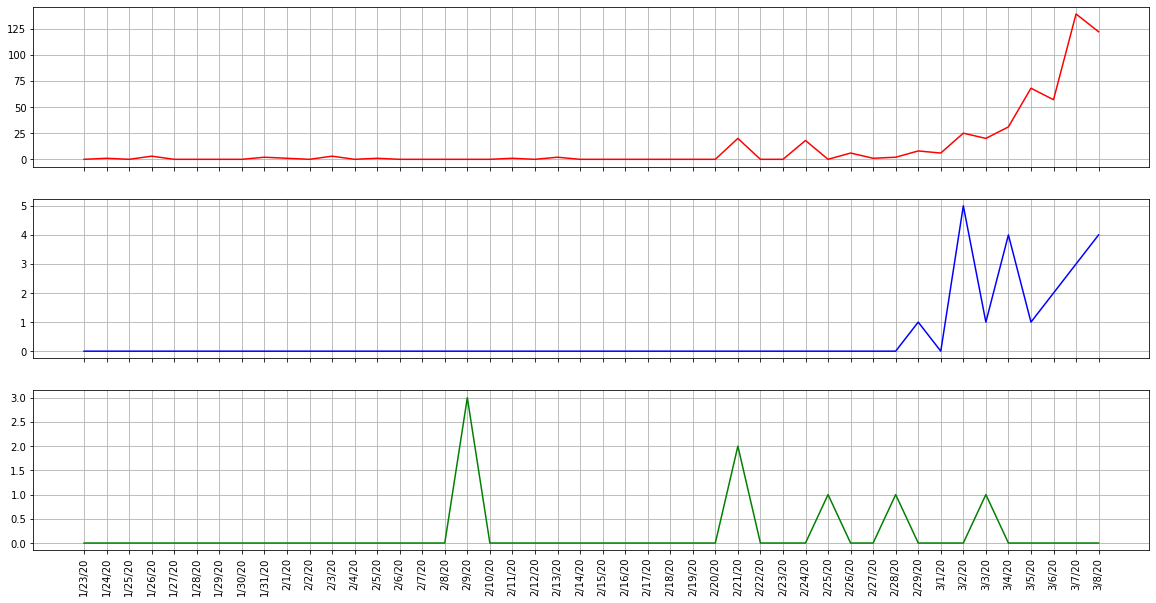

In [1209]:
fig, axs = plt.subplots(3, figsize=(20, 10), sharex=True)
plt.xticks(rotation=90)
axs[0].plot(us_total.columns[1:], us_infection_rate, color='red')
axs[1].plot(us_total.columns[1:], us_death_rate, color='blue')
axs[2].plot(us_total.columns[1:], us_recovery_rate, color='green')

In [1210]:
us_no_cruise = corona[
    (corona['Country/Region'] == 'US') & 
    (corona["Province/State"].str.contains("Princess") == False)
]

us_no_cruise[['City', 'State']] = us_no_cruise['Province/State'].apply(
    lambda row: pd.Series(row.split(', '))
)

cols = list(us_no_cruise)
cols.insert(0, cols.pop(cols.index('City')))
cols.insert(1, cols.pop(cols.index('State')))
us_no_cruise = us_no_cruise.loc[:, cols]
us_no_cruise = us_no_cruise.drop(columns='Province/State')

us_no_cruise

us_no_cruise_group = us_no_cruise.groupby(['State', 'Case_Type']).sum()

us_no_cruise_group
us_no_cruise_group.loc[:, ::-1]

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


3/8/20  3/7/20  3/6/20  3/5/20  3/4/20  3/3/20  3/2/20  \
State Case_Type                                                           
AZ    Confirmed       5       5       2       1       1       1       1   
      Deaths          0       0       0       0       0       0       0   
      Recovered       1       1       1       1       1       1       1   
CA    Confirmed      98      81      59      51      35      25      21   
      Deaths          1       1       1       1       1       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
WA    Deaths         18      16      13      11      10       7       6   
      Recovered       1       1       1       1       1       1       1   
WI    Confirmed       1       1       1       1       1       1       1   
      Deaths          0       0       0       0       0       0       0   
      Recovered       1       1       1       1       1       1       0   

                 3/1/20  2/29/20  2/28/20  2/27/20  2/26/20  2/25/20  2/24/20  \
State Case_Type                                                                 
AZ    Confirmed       1        1        1        1        1        1        1   
      Deaths          0        0        0        0        0        0        0   
      Recovered       1        1        1        1        1        1        0   
CA    Confirmed      12       12       11       11       10       10       10   
      Deaths          0        0        0        0        0        0        0   
...                 ...      ...      ...      ...      ...      ...      ...   
WA    Deaths          1        1        0        0        0        0        0   
      Recovered       1        1        1        1        1        1        1   
WI    Confirmed       1        1        1        1        1        1        1   
      Deaths          0        0        0        0        0        0        0   
      Recovered       0        0        0        0        0        0        0   

                 2/23/20  2/22/20  2/21/20  2/20/20  2/19/20  2/18/20  \
State Case_Type                                                         
AZ    Confirmed        1        1        1        1        1        1   
      Deaths           0        0        0        0        0        0   
      Recovered        0        0        0        0        0        0   
CA    Confirmed       10       10       10        8        8        8   
      Deaths           0        0        0        0        0        0   
...                  ...      ...      ...      ...      ...      ...   
WA    Deaths           0        0        0        0        0        0   
      Recovered        1        1        1        1        1        1   
WI    Confirmed        1        1        1        1        1        1   
      Deaths           0        0        0        0        0        0   
      Recovered        0        0        0        0        0        0   

                 2/17/20  2/16/20  2/15/20  2/14/20  2/13/20  2/12/20  \
State Case_Type                                                         
AZ    Confirmed        1        1        1        1        1        1   
      Deaths           0        0        0        0        0        0   
      Recovered        0        0        0        0        0        0   
CA    Confirmed        8        8        8        8        8        7   
      Deaths           0        0        0        0        0        0   
...                  ...      ...      ...      ...      ...      ...   
WA    Deaths           0        0        0        0        0        0   
      Recovered        1        1        1        1        1        1   
WI    Confirmed        1        1        1        1        1        1   
      Deaths           0        0        0        0        0        0   
      Recovered        0        0        0        0        0        0   

                 2/11/20  2/10/20  2/9/20  2/8/20  2/7/20  2/6/20  2/5/20  \
State Case

In [1252]:
us_no_cruise_group.index

fig, ax = plt.subplots()
index = np.arange(len(us_no_cruise_group))
bar_width = 0.2

# idk = us_no_cruise_group.loc['AZ', 'Confirmed'][-1]

# ax1 = plt.bar(index, [idk, 3, 7, 5], width=0.35)
# ax2 = plt.bar(index+0.35, [1, 2, 3, 6], width=0.35)

# plt.show()
# fig, ax = plt.subplots()
# ax.bar()

105

# MISC CODE

In [1212]:
# set y_axis
confirmed_y = np.arange(0, math.ceil(max(china_infection_rate) + 1000), 1000)
deaths_y = np.arange(0, math.ceil(max(china_death_rate) + 100), 100)

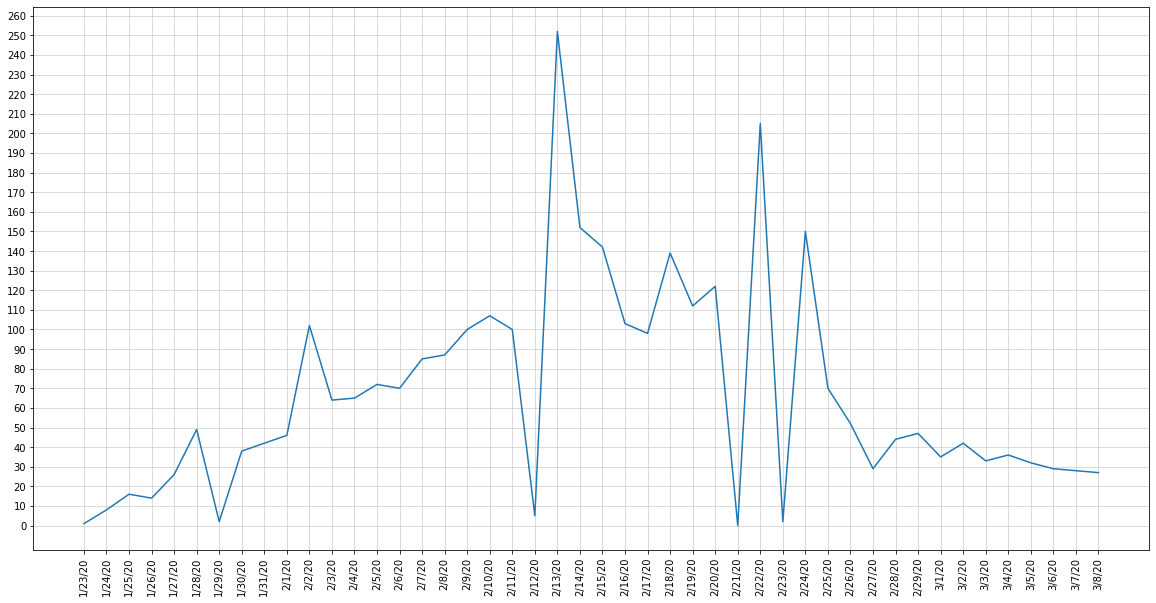

In [1213]:
# death rate graph

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, math.ceil(max(china_death_rate))+10, 10))
plt.grid(b=True, which='major', color='#d3d3d3', linestyle='-')
plt.plot(china_total.columns[1:], china_death_rate)
plt.show()

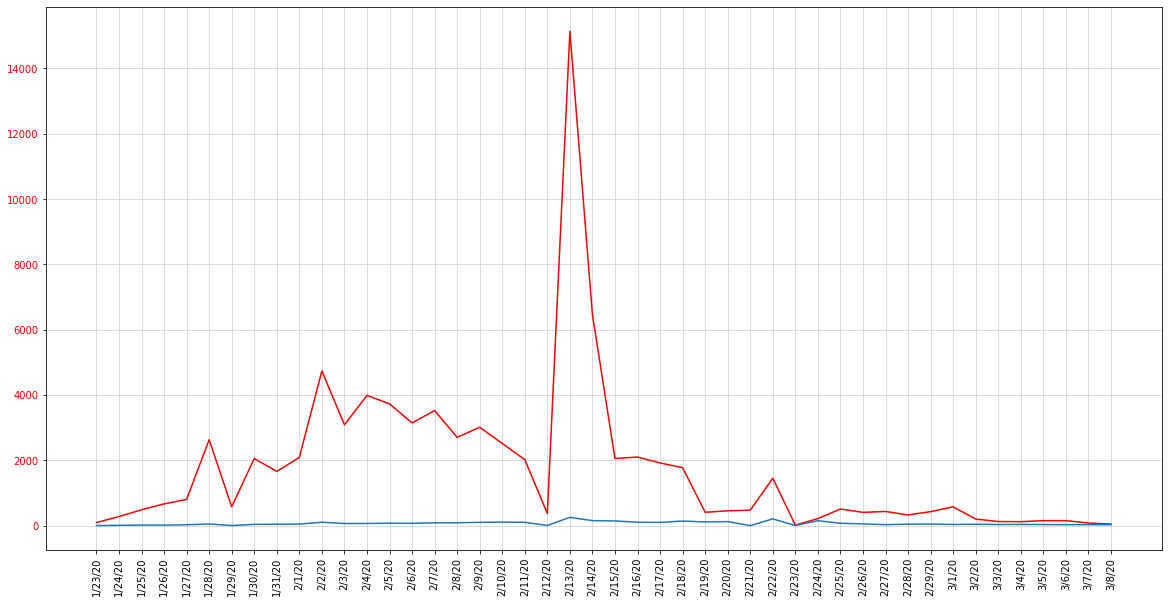

In [1214]:
# graph rates

fig, ax1 = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=90)

# CONFIRMED
# ax1.set_yscale("log", basey=2)
ax1.grid(b=True, which='major', color='#d3d3d3', linestyle='-')
ax1.plot(china_total.columns[1:], china_infection_rate, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax1.plot(china_total.columns[1:], china_death_rate)

# ax2 = ax1.twinx()

# ax2.set_yscale("log", basey=10)

# DEATHS
# ax2.plot(china_total.columns[1:], china_death_rate)
# ax2.tick_params(axis='y', labelcolor='blue')

# RECOVERY
# ax3 = ax1.twinx()
# ax3.plot(china_total.columns[1:], china_recovery_rate, color='green')
# ax3.tick_params(axis='y', labelcolor='green')


plt.show()

In [1217]:
# comparing infection and death rate

print('china_infection_rate[1] / china_confirmed[0]')
print(china_death_rate[1] / china_deaths[0])

# china_confirmed[0] // 2
# china_infection_rate[1]
# china_death_rate[1]
# china_confirmed[1]

china_infection_rate[1] / china_confirmed[0]
0.47058823529411764


In [ ]:
# distribution plot

plt.hist(china_infection_rate, bins=16)
np.mean(china_infection_rate)

In [ ]:
sns.distplot(china_infection_rate)

# TODO

Zika
- need to remove irrelevant data_field values
- find a way to combine location fields by country

Ebola
- need to remove irrelevant data_field values

# Zika Virus

In [ ]:
# zika_df.head()

Drop the `time_period` and `time_period_type` columns as they are unnecessary.

In [ ]:
zika_df = zika_df.drop(columns=['time_period', 'time_period_type'])
zika_df.head()

In [ ]:
zika_df = zika_df.sort_values(by='report_date')
zika_df.head()

In [ ]:
sorted(zika_df.data_field.astype(str).unique())

In [ ]:
# zika_df.data_field[zika_df.data_field == 'zika_confirmed_cumulative_2016'].count()
# zika_df.location[zika_df.location_type == 'country'].value_counts()
# zika_df.location.apply(lambda x: x.contains('_')).value_counts()
# zika_df.location[zika_df.location.str.contains('-') == True].value_counts()
# zika_df[(zika_df.location == 'Dominican_Republic-Distrito_Nacional') & (zika_df.data_field == 'total_zika_new_suspected')].sort_values(by="report_date")

# zika_df[(zika_df.location.str.contains('Dominican_Republic')) & (zika_df.data_field == 'total_zika_new_confirmed')].sort_values(by="report_date")

# zika_df.location[zika_df.location.str.contains('Dominican_Republic', na=False)].value_counts()

# zika_df.tail()

# Ebola Virus

In [ ]:
ebola_df.head()
ebola_df[['Date', 'Country', 'Indicator', 'value']]

In [ ]:
ebola_df = ebola_df.sort_values(by='Date')
ebola_df.head()

In [ ]:
sorted(ebola_df.Indicator.unique())